In [91]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
from matplotlib.pyplot import figure
from sklearn.metrics import r2_score,mean_squared_error

In [92]:
data = pd.read_csv('/content/Engineering_graduate_salary.csv', index_col=0)
data.head()

,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
ID,,,,,,,,,,,,,,,,,,,,,
604399,f,22-10-1990,87.80,cbse,2009,84.00,cbse,6920,1,B.Tech/B.E.,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
988334,m,15-05-1990,57.00,cbse,2010,64.50,cbse,6624,2,B.Tech/B.E.,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
301647,m,21-08-1989,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,B.Tech/B.E.,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
582313,m,04-05-1991,84.30,cbse,2009,86.00,cbse,8195,1,B.Tech/B.E.,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
339001,f,30-10-1990,82.00,cbse,2008,75.00,cbse,4889,2,B.Tech/B.E.,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2998 entries, 604399 to 993701
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 2998 non-null   object 
 1   DOB                    2998 non-null   object 
 2   10percentage           2998 non-null   float64
 3   10board                2998 non-null   object 
 4   12graduation           2998 non-null   int64  
 5   12percentage           2998 non-null   float64
 6   12board                2998 non-null   object 
 7   CollegeID              2998 non-null   int64  
 8   CollegeTier            2998 non-null   int64  
 9   Degree                 2998 non-null   object 
 10  Specialization         2998 non-null   object 
 11  collegeGPA             2998 non-null   float64
 12  CollegeCityID          2998 non-null   int64  
 13  CollegeCityTier        2998 non-null   int64  
 14  CollegeState           2998 non-null   object 
 1

In [94]:
data.describe()

,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,English,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
count,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,...,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2.998000e+03
mean,77.666264,2008.080720,74.341061,5210.210807,1.924616,71.509857,5210.210807,0.296197,2011.939960,501.066378,...,24.138759,16.267845,31.068379,1.946965,-0.038714,0.126217,-0.008662,-0.145965,-0.141111,3.051748e+05
std,10.002785,1.631814,11.120299,4776.609877,0.264053,8.122462,4776.609877,0.456655,36.780582,105.304512,...,99.785138,86.054739,103.552963,32.241501,1.024974,0.955831,0.962695,1.012901,1.007134,2.123312e+05
min,43.000000,1998.000000,40.000000,2.000000,1.000000,6.630000,2.000000,0.000000,0.000000,180.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-3.893300,-5.781600,-4.600900,-2.643000,-7.375700,3.500000e+04
25%,71.140000,2007.000000,66.000000,526.250000,2.000000,66.530000,526.250000,0.000000,2012.000000,425.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-0.649100,-0.435300,-0.604800,-0.868200,-0.669200,1.800000e+05
50%,78.965000,2008.000000,74.000000,4027.500000,2.000000,71.800000,4027.500000,0.000000,2013.000000,500.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.172700,-0.094300,3.000000e+05
75%,85.600000,2009.000000,82.600000,8822.250000,2.000000,76.300000,8822.250000,1.000000,2014.000000,570.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400,3.700000e+05
max,97.760000,2012.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,2017.000000,875.000000,...,623.000000,660.000000,548.000000,500.000000,1.995300,1.904800,2.161700,3.352500,1.630200,4.000000e+06


In [95]:
data.isnull().sum()

Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
openess_to_experience    0
Salary                   0
dtype: int64

In [96]:
# dropping features which do not make any sense to predict salary
data.drop(['CollegeID', '10board','12graduation','12board' ,'CollegeID' , 'CollegeCityID','CollegeState'
                                     , 'CollegeCityTier','DOB'], axis = 1, inplace = True)

In [97]:
data.shape

(2998, 25)

In [98]:
data.replace(to_replace=-1, value=0,inplace=True)

In [99]:
data.head()

,Gender,10percentage,12percentage,CollegeTier,Degree,Specialization,collegeGPA,GraduationYear,English,Logical,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
ID,,,,,,,,,,,,,,,,,,,,,
604399,f,87.80,84.00,1,B.Tech/B.E.,instrumentation and control engineering,73.82,2013,650,665,...,0,0,0,0,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
988334,m,57.00,64.50,2,B.Tech/B.E.,computer science & engineering,65.00,2014,440,435,...,0,0,0,0,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
301647,m,77.33,85.17,2,B.Tech/B.E.,electronics & telecommunications,61.94,2011,485,475,...,0,0,260,0,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
582313,m,84.30,86.00,1,B.Tech/B.E.,computer science & engineering,80.40,2013,675,620,...,0,0,0,0,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
339001,f,82.00,75.00,2,B.Tech/B.E.,biotechnology,64.30,2012,575,495,...,0,0,0,0,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [100]:
# list of columns with null values 
missing_values_columns = [col for col in data.columns if data.isnull().sum()[col] > 0]
missing_values_columns

[]

In [101]:
data["Gender"] = data["Gender"].replace({'m': 0, 'f': 1})
data.head()

,Gender,10percentage,12percentage,CollegeTier,Degree,Specialization,collegeGPA,GraduationYear,English,Logical,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
ID,,,,,,,,,,,,,,,,,,,,,
604399,1,87.80,84.00,1,B.Tech/B.E.,instrumentation and control engineering,73.82,2013,650,665,...,0,0,0,0,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
988334,0,57.00,64.50,2,B.Tech/B.E.,computer science & engineering,65.00,2014,440,435,...,0,0,0,0,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
301647,0,77.33,85.17,2,B.Tech/B.E.,electronics & telecommunications,61.94,2011,485,475,...,0,0,260,0,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
582313,0,84.30,86.00,1,B.Tech/B.E.,computer science & engineering,80.40,2013,675,620,...,0,0,0,0,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
339001,1,82.00,75.00,2,B.Tech/B.E.,biotechnology,64.30,2012,575,495,...,0,0,0,0,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


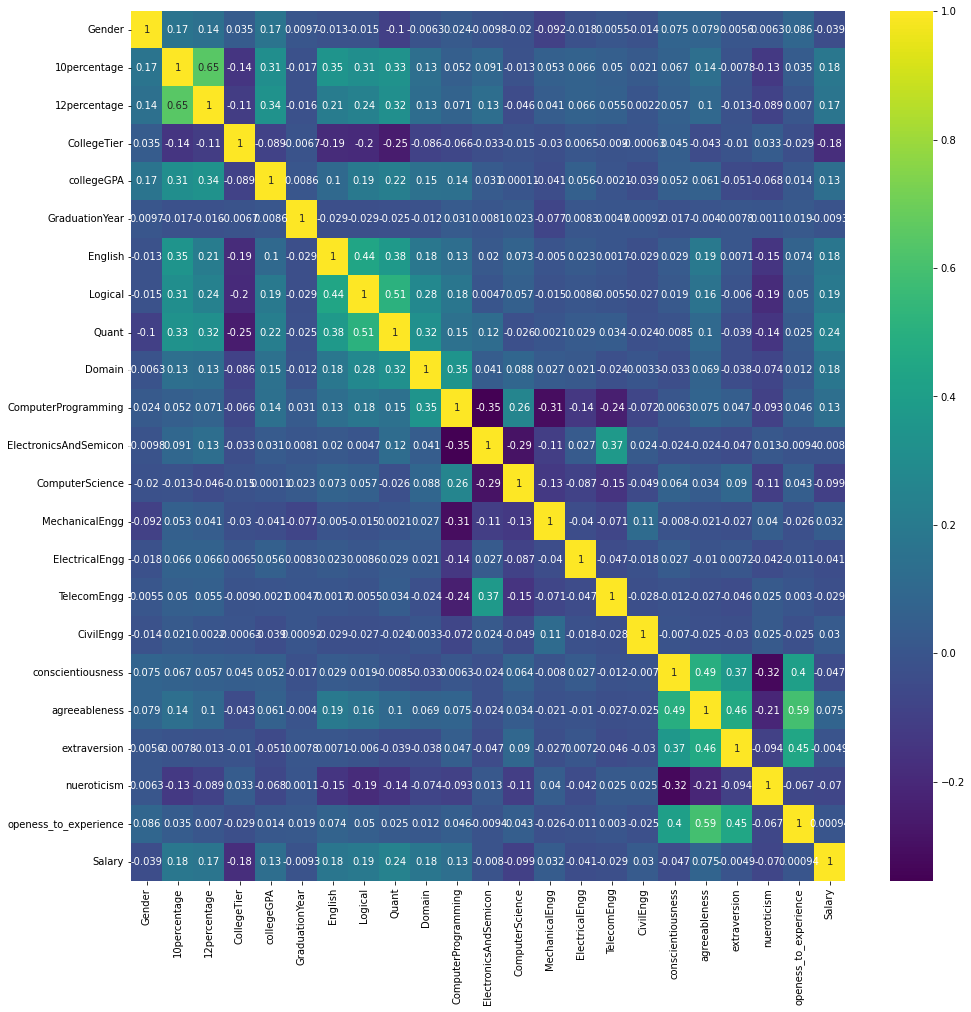

In [102]:
plt.figure(figsize=(16,16))
sns.heatmap(data.corr(),annot=True,cmap='viridis')
plt.show()

Text(0.5, 1.0, 'Bar Plot of Degree with Salary')

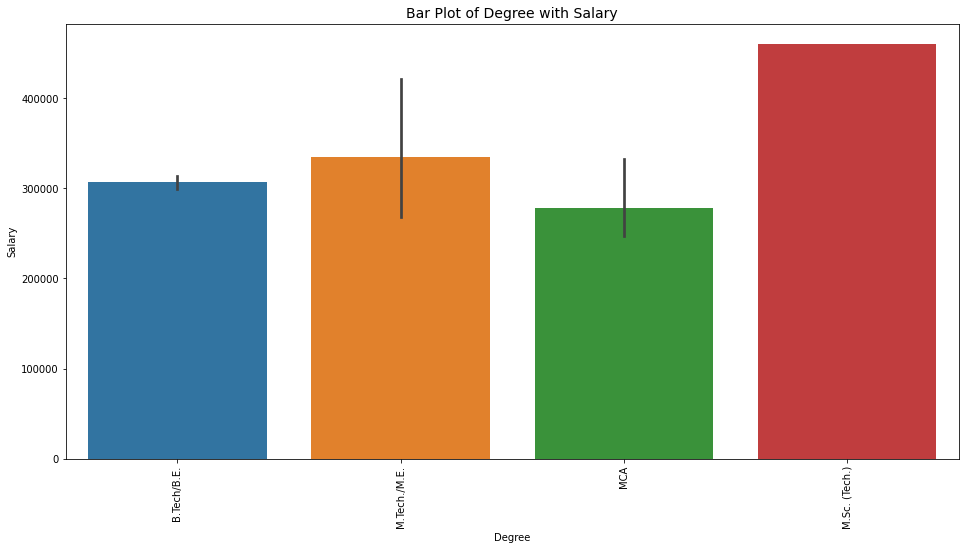

In [103]:
figure(figsize=(16,8))
plot = sns.barplot(x=data["Degree"],y=data["Salary"])
plot.set_xticklabels(plot.get_xticklabels(),rotation="vertical")
plot.set_title("Bar Plot of Degree with Salary", fontsize=14)

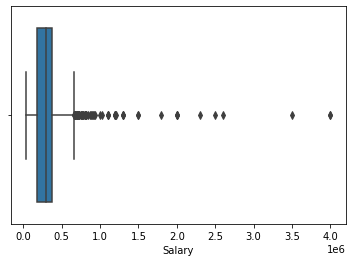

In [104]:
 sns.boxplot(x=data.Salary)

This can be because of Outliers outliers are the points in the dataset which show high deviation from most of the data.

To make it a more normalised distribution we can remove Outliers

We can remove outliers using various algorithms and technique

Here I am going to use Z-Score Z-Score is the how much times the standard deviation a point is deviated from the mean value. We will replace the values that are very largely deviated with the median value.

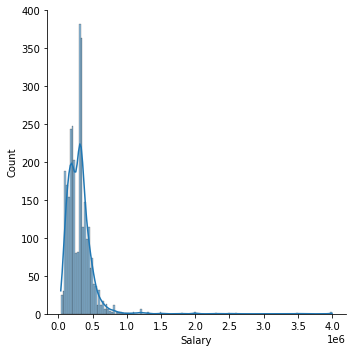

In [105]:
plot = sns.displot(data=data["Salary"], kde=True)

In [106]:
from scipy.stats import zscore
from numpy import where,abs,median,nan,sqrt

In [107]:
  data["Salary"] = data["Salary"].replace([data["Salary"][(abs(zscore(data["Salary"])) > 3)]], median(data["Salary"]))

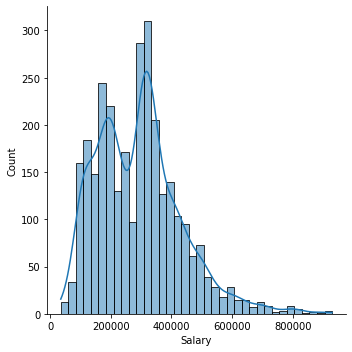

In [108]:
plot = sns.displot(data=data["Salary"], kde=True)

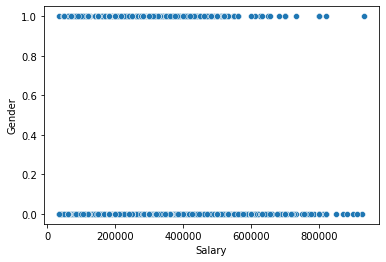

In [109]:
sns.scatterplot(x=data.Salary, y=data.Gender)

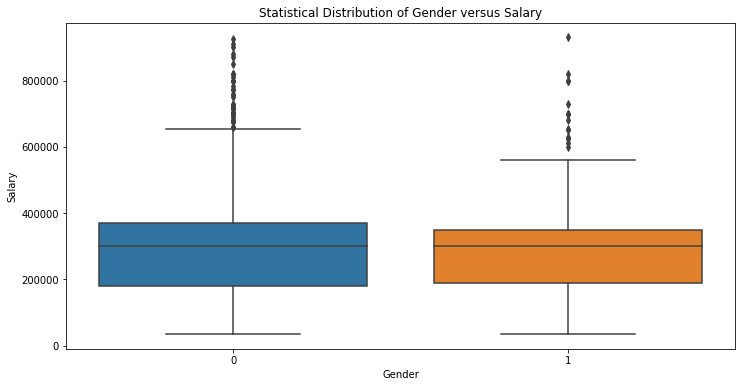

In [110]:
plt.figure(figsize=(12,6))
sns.boxplot( x=data['Gender'], y=data['Salary'] )

plt.title('Statistical Distribution of Gender versus Salary')
plt.show()

It is clearly visible from the plot that the Average salary for man and woman are looking almost same.

**Analysis of 10th and 12th percentage by college tier**

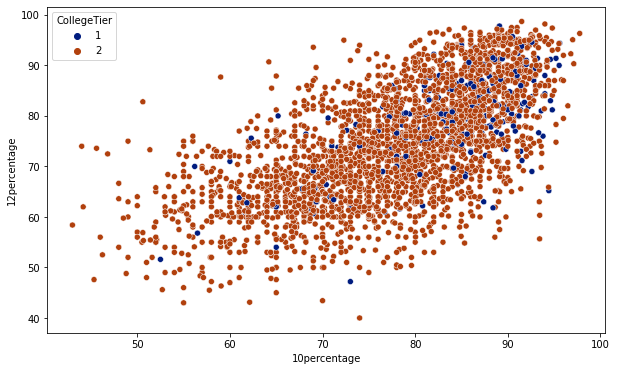

In [111]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = '10percentage', y = '12percentage', hue = 'CollegeTier',palette='dark', data = data)
plt.show()

According to correlation plot and scatterplot, we can see that 10th and 12th are positively correlated, this is the case of multicollinearity so I have decided to keep only one.

In [112]:
# checking the count of unique specialization present in dataframe
data.Specialization.value_counts()

electronics and communication engineering      670
computer science & engineering                 557
information technology                         506
computer engineering                           415
computer application                           201
mechanical engineering                         155
electronics and electrical engineering         148
electronics & telecommunications                89
electrical engineering                          63
electronics & instrumentation eng               24
instrumentation and control engineering         18
information science engineering                 18
electronics and instrumentation engineering     18
civil engineering                               15
electronics engineering                         13
biotechnology                                   12
other                                           10
industrial & production engineering              8
chemical engineering                             7
applied electronics and instrum

In [113]:
 
df = data.copy()
# count of unique categories in specialization
value_count = data['Specialization'].value_counts()

def map_to_other_specialization(var):
    if var in value_count[value_count<=10]:
        return 'other'
    else:
        return var
    
# apply the function to specialization to get the results    
data['Specialization'] = data.Specialization.apply(map_to_other_specialization)

 if count of unique category is less than 10, replace the category as other 

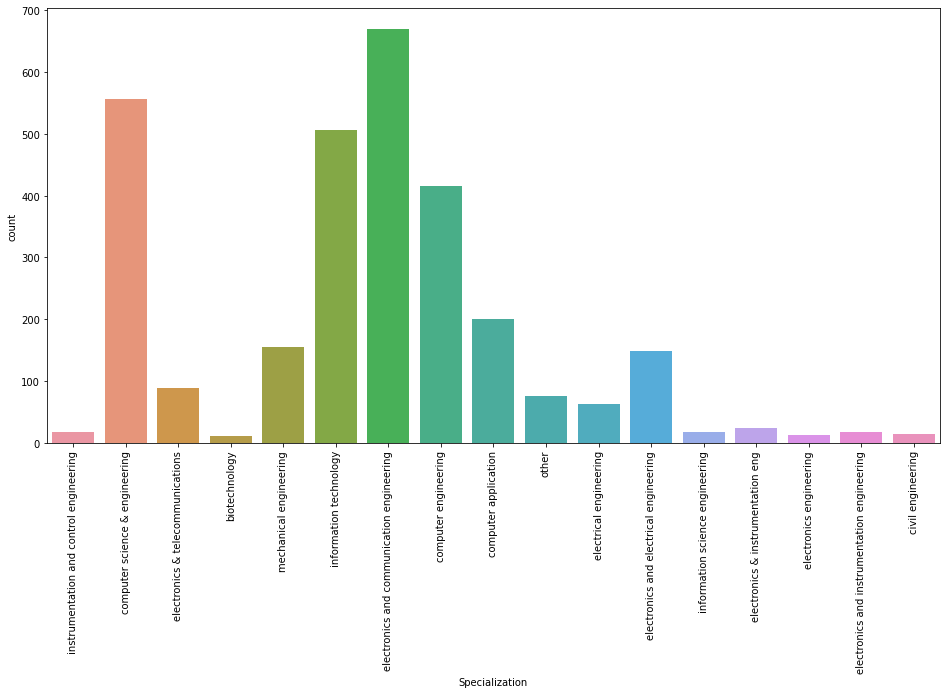

In [114]:
plt.figure(figsize = (16, 8))
total = float(len(data))
p = sns.countplot(x='Specialization',data=data)
plt.xticks(rotation = 90)
plt.show()

In [115]:
# electronics & instrumentation engineering is repeating here with slight change in name so converting it into one category
data['Specialization'] = data['Specialization'].str.replace('electronics & instrumentation eng',\
                                                'electronics and instrumentation engineering')

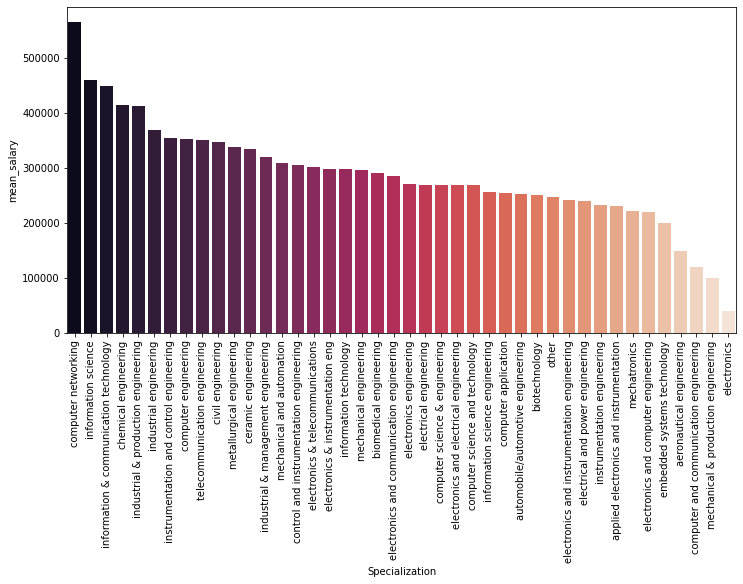

In [116]:
avg_sal_per_specialization = df.groupby('Specialization').agg(mean_salary =("Salary", 'mean')).sort_values(by = 'mean_salary',ascending=False)

# barplot of mean salary and specialization
plt.figure(figsize = (12, 6))
sns.barplot(x = avg_sal_per_specialization.index,y = 'mean_salary',data = avg_sal_per_specialization,palette='rocket')
plt.xticks(rotation = 90)
plt.show()

ICE Engineer, Computer Engineer and Electronics Engineer having highest mean salary

**Analysis of Salary and College GPA**

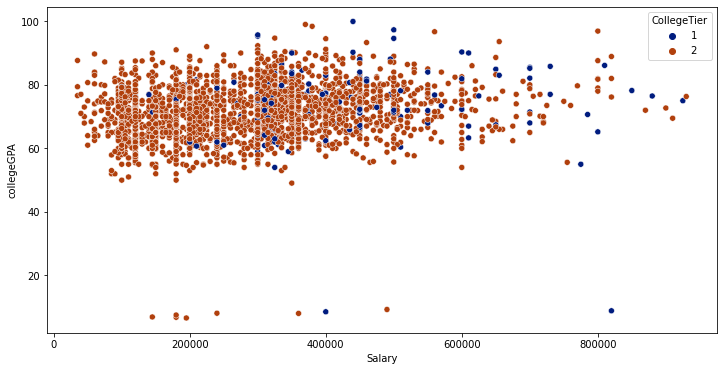

In [117]:
plt.figure(figsize = (12, 6))
sns.scatterplot(x ='Salary', y = 'collegeGPA',hue='CollegeTier',data=df,palette = 'dark')
plt.show()

In [118]:
data = data.loc[(data['collegeGPA'] > 40) & (data['Salary'] < 1500000)]

In [119]:
data.shape

(2989, 25)

**Analysis of Salary and Degree**

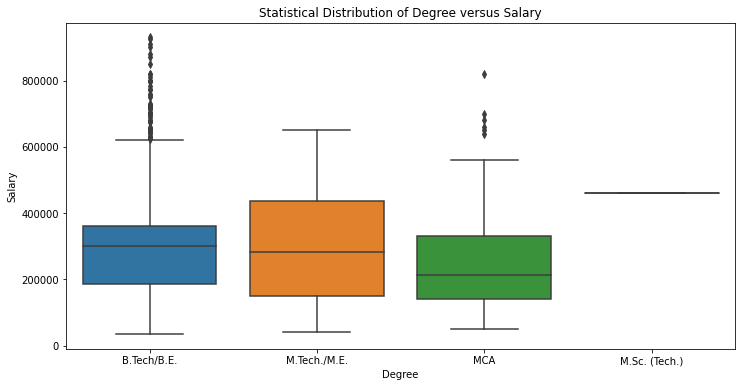

In [120]:
plt.figure(figsize=(12,6))
sns.boxplot( x=data['Degree'], y=data['Salary'] )

plt.title('Statistical Distribution of Degree versus Salary')
plt.show()

In [121]:
data['Degree'].value_counts()

B.Tech/B.E.      2750
MCA               200
M.Tech./M.E.       38
M.Sc. (Tech.)       1
Name: Degree, dtype: int64

Average salary is highest for BE/B.tech graduates as compared to any other degree graduates.

In [122]:
data = pd.get_dummies(data, columns=["Degree"], prefix="degree_")

In [123]:
data = pd.get_dummies(data, columns=["Specialization"], prefix="specialization_")

In [124]:
# Split df into dependent(y) and indepedent variables(X)
X = data.drop('Salary',axis=1)
y = data['Salary']

In [125]:
data.isnull().sum()

Gender                                                         0
10percentage                                                   0
12percentage                                                   0
CollegeTier                                                    0
collegeGPA                                                     0
GraduationYear                                                 0
English                                                        0
Logical                                                        0
Quant                                                          0
Domain                                                         0
ComputerProgramming                                            0
ElectronicsAndSemicon                                          0
ComputerScience                                                0
MechanicalEngg                                                 0
ElectricalEngg                                                 0
TelecomEngg              

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [127]:
#importing Linear regression from sklearn
from sklearn.linear_model import LinearRegression
reg=LinearRegression()    #instantiating linear regression
reg.fit(X_train,y_train)

LinearRegression()

In [128]:
print(reg.intercept_)
print(reg.coef_)

-48221.60300065315
[-1.96187385e+04  8.89554631e+02  6.66734860e+02 -5.27329336e+04
  2.32896194e+03 -3.07101168e+00  1.60911762e+02  2.84982089e+01
  1.92282340e+02  3.26185362e+04  4.30555886e+01 -2.57025606e+01
 -1.34783420e+02  2.24967161e+01 -7.98345726e+01  6.08663271e+00
  4.38047901e+02 -9.03992054e+03  2.24550295e+03  5.99278112e+03
 -1.87401312e+03  8.90615941e+01 -6.93183019e+04 -3.63797881e-11
 -7.75973842e+04  1.46915686e+05 -3.60768914e+04 -1.09602954e+05
 -2.11052889e+05  5.82489376e+04  1.78196096e+04  2.36426103e+04
  3.67349614e+04  1.26221403e+04  8.47946478e+03  2.89985257e+04
  4.26491621e+04  3.53534234e+04  3.40530843e+04  3.45467960e+04
 -5.05216203e+00  2.35890718e+04]


In [129]:
lm1 = smf.ols(formula='Salary~English+Quant+Logical+Domain+conscientiousness+agreeableness+ extraversion+nueroticism +openess_to_experience ', data=data).fit()

# print the coefficients
lm1.params

Intercept                 6621.410508
English                    156.683433
Quant                      294.193827
Logical                     44.785451
Domain                   55130.667486
conscientiousness        -9075.851305
agreeableness             8147.695575
extraversion              1480.453356
nueroticism              -1918.859741
openess_to_experience    -3372.779234
dtype: float64

In [130]:
feature_cols = ['English','Quant','Logical','Domain','conscientiousness','agreeableness','extraversion','nueroticism' ,'openess_to_experience']
X = data[feature_cols]
y = data.Salary

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X, y)

# print the coefficients
print(lm2.intercept_)
print(lm2.coef_)

6621.410507518507
[ 1.56683433e+02  2.94193827e+02  4.47854508e+01  5.51306675e+04
 -9.07585130e+03  8.14769557e+03  1.48045336e+03 -1.91885974e+03
 -3.37277923e+03]


In [131]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     65.99
Date:                Sun, 28 Aug 2022   Prob (F-statistic):          5.22e-111
Time:                        07:43:08   Log-Likelihood:                -39379.
No. Observations:                2989   AIC:                         7.878e+04
Df Residuals:                    2979   BIC:                         7.884e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              6621.4105   1.56e+04      0.425      0.671   -2.39e+04    3.71e+04
English                 156.6834     25.499      6.145      0.000     106.686     206.681
Quant                   294.1938     23.198     12.682      0.000     248.709     339.679
Logical                  44.7855     33.358      1.343      0.180     -20.621     110.192
Domain                 5.513e+04   8283.772      6.655      0.000    3.89e+04    7.14e+04
conscientiousness     -9075.8513   2819.056     -3.219      0.001   -1.46e+04   -3548.357
agreeableness          8147.6956   3414.604      2.386      0.017    1452.475    1.48e+04
extraversion           1480.4534   2870.465      0.516      0.606   -4147.841    7108.748
nueroticism           -1918.8597   2509.826     -0.765      0.445   -6840.029    3002.309
openess_to_experience -3372.7792   3005.311     -1.122      0.262   -9265.475    2519.917
==============================================================================
Omnibus:                      363.017   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              579.167
Skew:                           0.848   Prob(JB):                    1.72e-126
Kurtosis:                       4.331   Cond. No.                     5.92e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [132]:
y_pred = reg.predict(X_test)

print(sqrt(mean_squared_error(y_test,y_pred)))
print(r2_score(y_test,y_pred))

119404.93046798235
0.271903900863532
